In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
import re

# Download NLTK stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\ranga
[nltk_data]     komaravalli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
# Load the dataset
df = pd.read_csv('Twitter_Data.csv')

# Display the first few rows of the dataframe
print(df.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [4]:
#Convert Dependent Variable to Categorical
# Map numerical categories to text labels
df['category'] = df['category'].map({0: 'Neutral', -1: 'Negative', 1: 'Positive'})
print(df['category'].value_counts())


category
Positive    72250
Neutral     55213
Negative    35510
Name: count, dtype: int64


In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()
print(df.isnull().sum())


clean_text    4
category      7
dtype: int64
clean_text    0
category      0
dtype: int64


In [8]:
#Text Cleaning
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_tweet'] = df['clean_text'].apply(clean_text)
print(df.head())


                                          clean_text  category  \
0  when modi promised “minimum government maximum...  Negative   
1  talk all the nonsense and continue all the dra...   Neutral   
2  what did just say vote for modi  welcome bjp t...  Positive   
3  asking his supporters prefix chowkidar their n...  Positive   
4  answer who among these the most powerful world...  Positive   

                                       cleaned_tweet  
0  modi promised minimum government maximum gover...  
1             talk nonsense continue drama vote modi  
2  say vote modi welcome bjp told rahul main camp...  
3  asking supporters prefix chowkidar names modi ...  
4  answer among powerful world leader today trump...  


In [9]:
#Add sentence length column
df['sentence_length'] = df['cleaned_tweet'].apply(lambda x: len(x.split()))
print(df.head())


                                          clean_text  category  \
0  when modi promised “minimum government maximum...  Negative   
1  talk all the nonsense and continue all the dra...   Neutral   
2  what did just say vote for modi  welcome bjp t...  Positive   
3  asking his supporters prefix chowkidar their n...  Positive   
4  answer who among these the most powerful world...  Positive   

                                       cleaned_tweet  sentence_length  
0  modi promised minimum government maximum gover...               21  
1             talk nonsense continue drama vote modi                6  
2  say vote modi welcome bjp told rahul main camp...               13  
3  asking supporters prefix chowkidar names modi ...               19  
4  answer among powerful world leader today trump...               10  


In [10]:
#split the data into dependent and independent variables
X = df['cleaned_tweet']
y = df['category']


In [11]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

# Add padding
max_length = max(df['sentence_length'])
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
y_encoded = label_binarizer.fit_transform(y)


In [12]:
#Building and complie LSTM Model
# Define the model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 categories: Positive, Negative, Neutral
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


D:\datascience\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)


In [14]:
#Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 540s 129ms/step - accuracy: 0.7497 - loss: 0.6174 - val_accuracy: 0.9135 - val_loss: 0.2961
Epoch 2/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 621s 152ms/step - accuracy: 0.9235 - loss: 0.2599 - val_accuracy: 0.9196 - val_loss: 0.2768
Epoch 3/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 631s 155ms/step - accuracy: 0.9444 - loss: 0.1944 - val_accuracy: 0.9111 - val_loss: 0.2995
Epoch 4/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 678s 166ms/step - accuracy: 0.9583 - loss: 0.1475 - val_accuracy: 0.9069 - val_loss: 0.3234
Epoch 5/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 553s 136ms/step - accuracy: 0.9676 - loss: 0.1142 - val_accuracy: 0.8979 - val_loss: 0.3910
Epoch 6/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 495s 122ms/step - accuracy: 0.9743 - loss: 0.0894 - val_accuracy: 0.8896 - val_loss: 0.4318
Epoch 7/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 478s 117ms/step - accuracy: 0.9794 - loss: 0.0701 - val_accuracy: 0.8731 - val_loss: 0.4872
Epoch 8/10
4075/4075 ━━━━━━━━━━━━━━━━━━━━ 508s 125ms/step - ac

In [15]:
# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_test_classes, y_pred, target_names=label_binarizer.classes_))


1019/1019 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step
              precision    recall  f1-score   support

    Negative       0.79      0.81      0.80      7152
     Neutral       0.91      0.89      0.90     11067
    Positive       0.89      0.89      0.89     14375

    accuracy                           0.87     32594
   macro avg       0.86      0.86      0.86     32594
weighted avg       0.87      0.87      0.87     32594



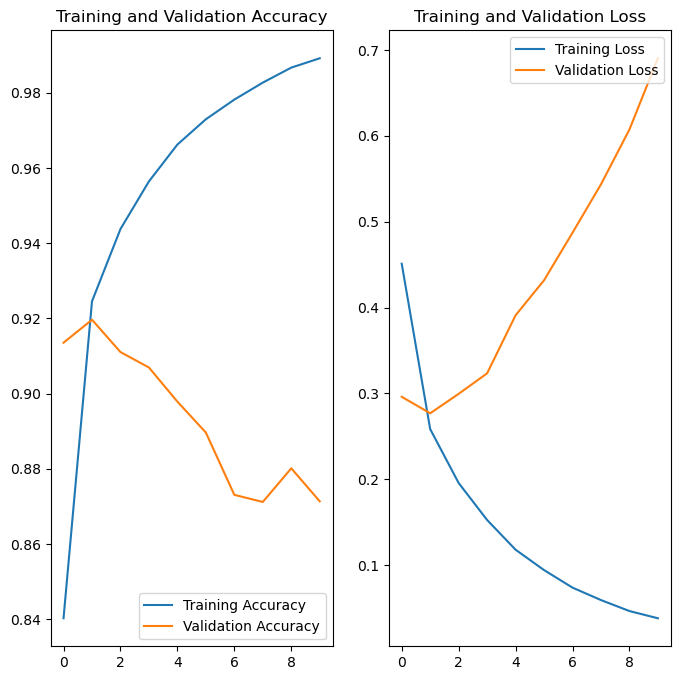

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
